<a href="https://colab.research.google.com/github/donghyuun/deep-learning/blob/main/lab_07_2_softmax_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


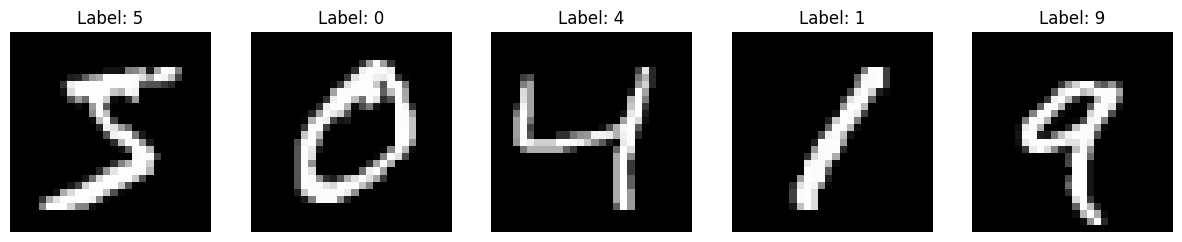

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5835 - loss: 1.5439
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8446 - loss: 0.6909
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.5561
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.4922
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.4629
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.4421
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.4249
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.4126
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8945 - loss: 0.3908
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8942 - loss: 0.3898
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.3788
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(10, activation='softmax')  # Dense layer with Softmax activation
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력


In [42]:
from PIL import Image
import numpy as np
import tensorflow as tf

# 1. 이미지 로드 및 변환
# 이미지 파일을 불러와 그레이스케일로 변환
img = Image.open("test.png").convert("L")

# 2. 크기 조정 (28x28)
# MNIST 데이터셋과 동일한 크기로 변환
img_resized = img.resize((28, 28), Image.Resampling.LANCZOS)  # 최신 Pillow 버전에 맞게 수정

# 3. 정규화 및 반전 (0~1 범위로 변환 및 색 반전)
# MNIST 데이터는 흰색 배경에 검은색 숫자이므로 반전
test_data = np.array(img_resized) / 255.0
test_data = 1 - test_data  # 색 반전 (필요 시)

# 4. 모델 입력 형태로 변환 (배치 차원 추가)
test_data = test_data.reshape(1, 28, 28)

# 5. 모델 예측
# 학습된 모델에 입력 데이터를 전달하여 예측 수행
res = model.predict(test_data)

# 6. 결과 출력
# 가장 높은 확률을 가진 클래스를 출력
predicted_class = tf.argmax(res, axis=1).numpy()[0]
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 6
